In [1]:
import pandas as pd
!pip install scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [3]:
import pandas as pd
# Read the Excel file into a pandas DataFrame
earlypayment = pd.read_excel("/Users/jeeniadhillon/Documents/MSU/Deloitte Project/Sample code/ExcelPdataN.xlsx")

# one Hot encoding 'SHKZG','BUKRS' column
# Assuming your DataFrame is named 'df'

print(earlypayment)


             LIFNR                 AUGDT         AUGBL       ZUONR  BUZEI  \
0      100009937.0   Apr 4 2022 12:00 AM  2.000023e+09       22017      1   
1      100004185.0  Jun 15 2022 12:00 AM  2.000073e+09         NaN      1   
2      100037508.0  Feb 15 2022 12:00 AM  2.000006e+09  6189236255      1   
3      100037508.0  Feb 15 2022 12:00 AM  2.000006e+09  6189236255      1   
4      100017981.0  Jan 17 2022 12:00 AM  2.000006e+09         NaN      1   
...            ...                   ...           ...         ...    ...   
13971  100037470.0                   NaN           NaN         NaN      1   
13972  100037604.0                   NaN           NaN         NaN      1   
13973  100000867.0                   NaN           NaN  5304985285      1   
13974  100002020.0                   NaN           NaN      393111      1   
13975  100018066.0                   NaN           NaN         NaN      1   

                      BUDAT                 BLDAT                 CPUDT  \


In [22]:
import pandas as pd

earlypayment = pd.read_csv("/Users/jeeniadhillon/Documents/MSU/Deloitte Project/Project Data/PData.csv")


earlypayment.columns

Index(['BUKRS', 'LIFNR', 'AUGDT', 'AUGBL', 'ZUONR', 'BUZEI', 'BUDAT', 'BLDAT',
       'CPUDT', 'XBLNR', 'BLART', 'SHKZG', 'BSCHL', 'ZFBDT', 'ZTERM', 'ZBD1T',
       'ZBD2T', 'ZBD3T', 'ZBD1P', 'ZBD2P', 'SKFBT', 'Sum.DMBE2.', 'Sum.WRBTR.',
       'invoicetime', 'paytime', 'after', 'earlydays', 'isearly', 'MONAT',
       'RSEG_BELNR', 'RSEG_GJAHR', 'AEDAT', 'RBKPKEY', 'numitems',
       'mincreatetime', 'minfirstreceivetime', 'avgGDdays', 'sumNETPR',
       'sumchangeconfirmeddeliverydate', 'sumchangecontract',
       'sumchangecurrency', 'sumchangedeliveryindicator',
       'sumchangefinalinvoiceindicator', 'sumchangeoutwarddeliveryindicator',
       'sumchangeprice', 'sumchangequantity', 'sumchangerequesteddeliverydate',
       'sumchangestoragelocation', 'dcountWERKS', 'dcountMATKL', 'dcountERNAM',
       'posPSTYP', 'sumnumdelivery'],
      dtype='object')

In [23]:
earlypayment.drop(['LIFNR', 'AUGDT', 'AUGBL', 'ZUONR', 'BUZEI', 'BUDAT', 'BLDAT', 'CPUDT', 'XBLNR', 'BLART', 'BSCHL', 'ZFBDT', 'ZTERM', 'invoicetime', 'paytime', 'RSEG_BELNR', 'RSEG_GJAHR', 'AEDAT', 'RBKPKEY', 'mincreatetime', 'minfirstreceivetime', 'earlydays', 'after'], axis=1,inplace=True)

earlypayment.columns
earlypayment = pd.get_dummies(earlypayment, columns=['SHKZG', 'BUKRS'])
earlypayment.dropna(inplace=True)
earlypayment.columns


Index(['ZBD1T', 'ZBD2T', 'ZBD3T', 'ZBD1P', 'ZBD2P', 'SKFBT', 'Sum.DMBE2.',
       'Sum.WRBTR.', 'isearly', 'MONAT', 'numitems', 'avgGDdays', 'sumNETPR',
       'sumchangeconfirmeddeliverydate', 'sumchangecontract',
       'sumchangecurrency', 'sumchangedeliveryindicator',
       'sumchangefinalinvoiceindicator', 'sumchangeoutwarddeliveryindicator',
       'sumchangeprice', 'sumchangequantity', 'sumchangerequesteddeliverydate',
       'sumchangestoragelocation', 'dcountWERKS', 'dcountMATKL', 'dcountERNAM',
       'posPSTYP', 'sumnumdelivery', 'SHKZG_Debit/Credit Indicator1',
       'SHKZG_Debit/Credit Indicator2', 'BUKRS_CompanyCode1',
       'BUKRS_CompanyCode10', 'BUKRS_CompanyCode12', 'BUKRS_CompanyCode13',
       'BUKRS_CompanyCode14', 'BUKRS_CompanyCode15', 'BUKRS_CompanyCode16',
       'BUKRS_CompanyCode17', 'BUKRS_CompanyCode18', 'BUKRS_CompanyCode19',
       'BUKRS_CompanyCode2', 'BUKRS_CompanyCode20', 'BUKRS_CompanyCode21',
       'BUKRS_CompanyCode23', 'BUKRS_CompanyCode24', '

In [24]:
# Assuming you have your feature matrix X and target variable y
X = earlypayment.drop(['isearly'],axis=1)  # Feature matrix without the target variable
y = earlypayment['isearly']  # Target variable


In [25]:
# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)



In [26]:
# Fit the classifier to your data
rf.fit(X, y)



RandomForestClassifier(random_state=42)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [29]:
# Create a feature selector based on the trained Random Forest
selector = SelectFromModel(rf, threshold='mean')

In [30]:
# Create a feature selector based on the trained Random Forest
selector = SelectFromModel(rf, threshold='mean')

In [31]:

# Transform your feature matrix to select the best features
X_selected = selector.transform(X)

/Users/jeeniadhillon/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [32]:
# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

In [33]:
# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

In [34]:


# Print the selected feature names
print("Selected features:")
for feature in selected_feature_names:
    print(feature)

Selected features:
ZBD1T
SKFBT
Sum.DMBE2.
Sum.WRBTR.
MONAT
numitems
avgGDdays
sumNETPR
sumnumdelivery
BUKRS_CompanyCode20
BUKRS_CompanyCode4


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have your features and labels in X and y variables
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8058823529411765


In [ ]:
earlypayment = pd.read_excel("/Users/jeeniadhillon/Documents/MSU/Deloitte Project/Sample code/ExcelPdataN.xlsx")

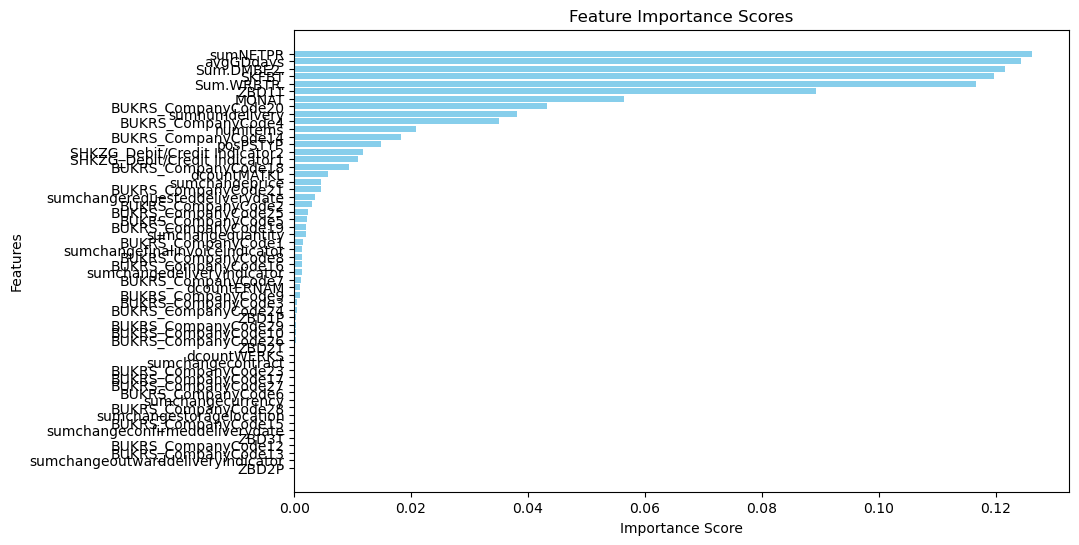

In [42]:
import matplotlib.pyplot as plt

# Get feature importance scores from the Random Forest model
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance scores
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Scores')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()


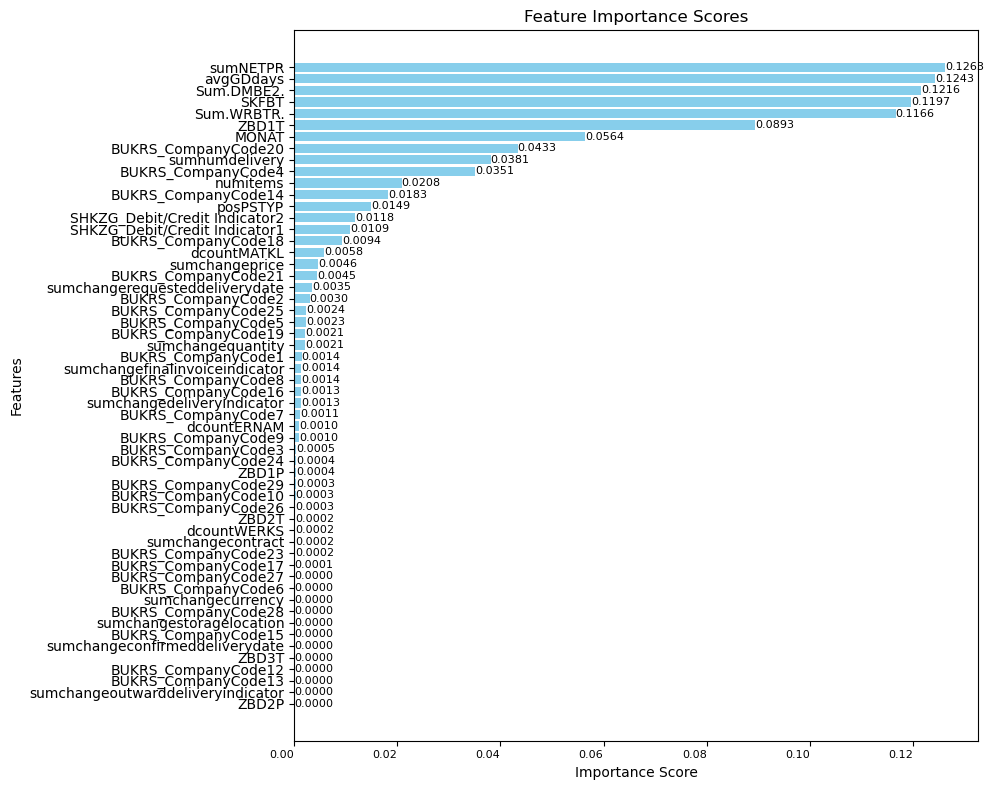

In [51]:
import matplotlib.pyplot as plt

# Get feature importance scores from the Random Forest model
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance scores
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Scores')

# Rotate y-axis labels for better readability
plt.yticks( ha='right')

# Add value labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, '{:.4f}'.format(bar.get_width()),
             va='center', ha='left', fontsize=8)

plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top

# Adjust x-axis label size and rotation
plt.xticks(fontsize=8, ha='right')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
